In [2]:
%matplotlib inline

In [3]:
from __future__ import division
import pandas as pd
pd.set_option('display.mpl_style', 'default') # Make the graphs a bit prettier
from collections import OrderedDict
from scipy.stats import norm
Z = norm.ppf
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
np.random.seed(sum(map(ord, "categorical")))

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2885: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [4]:
dataSheets = ['_tacsVWMAlpha.py_2016_May_26_1504_2.csv', '_tacsVWMAlpha.py_2016_May_26_1600.csv', 
'_tacsVWMAlpha.py_2016_May_26_1620.csv', '_tacsVWMAlpha.py_2016_May_26_1639.csv', '_tacsVWMAlpha.py_2016_May_26_1700.csv', 
'_tacsVWMAlpha.py_2016_May_26_1720.csv', '_tacsVWMAlpha.py_2016_May_26_1739.csv']

In [5]:
conds = OrderedDict([('t2d0', (2, 0)), ('t2d2', (2, 2)), ('t2d4', (2, 4)), ('t4d0', (4, 0)), ('t4d2', (4, 2)), ('t4d4', (4, 4))])

In [6]:
# counts number of trials corresponding to inputted conditions
def itemCounter(df, responseType, changeType, t, d):
    count = float(len(df[responseType & changeType & t & d]))
    return count

In [7]:
# calculates K pased on Pashler equation: K = S * ((H - F) / (1 - F))
def kCalculation(s, h, f):
    k = s * ((h - f) / (1 - f))
    return k

In [8]:
def pashlerK(csv):
    # read in csv file
    df = pd.read_csv(csv)

    # create conditions
    resps = df['Response key'] == 1
    noResps = df['Response key'] == 0
    changes = df['ChangeTrial'] == 1
    noChanges = df['ChangeTrial'] == 0
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4

    # initialize dictionaries
    hitRates = OrderedDict()
    fAlarmRates = OrderedDict()
    Kvals = OrderedDict()
    
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # store rate values
    for key in conds:
        hits = itemCounter(df, resps, changes, conds[key][0], conds[key][1])
        misses = itemCounter(df, noResps, changes, conds[key][0], conds[key][1])
        falarms = itemCounter(df, resps, noChanges, conds[key][0], conds[key][1])
        crejects = itemCounter(df, noResps, noChanges, conds[key][0], conds[key][1])
        hitRates[key] = hits/(hits+misses)
        fAlarmRates[key] = falarms/(falarms+crejects)
        s = 0
        if key == 't2d0' or key == 't2d2' or key == 't2d4':
            s = 2
        else:
            s = 4
        Kvals[key] = kCalculation(s, hitRates[key], fAlarmRates[key])
    return {'Kvals': Kvals, 'hitRates': hitRates, 'fAlarmRates': fAlarmRates}

In [9]:
def rtCalc(csv):
    # read in csv file
    df = pd.read_csv(csv)

    # create conditions
    resps = df['Response key'] == 1
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4

    # initialize dictionary
    RTRates = OrderedDict()
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # calculate average RT value
    for key in conds:
        rows = df[conds[key][0] & conds[key][1] & resps]
        rts = rows['Response time']
        meanRT = rts.mean()
        RTRates[key] = meanRT
    return RTRates

In [16]:
def dprime(csv):
     # read in csv file
    df = pd.read_csv(csv)
    
    # create conditions
    resps = df['Response key'] == 1
    noResps = df['Response key'] == 0
    changes = df['ChangeTrial'] == 1
    noChanges = df['ChangeTrial'] == 0
    targ2 = df['nTargets'] == 2
    targ4 = df['nTargets'] == 4
    dist0 = df['nDistractors'] == 0
    dist2 = df['nDistractors'] == 2
    dist4 = df['nDistractors'] == 4
    
    # initialize dict
    hits = OrderedDict()
    misses = OrderedDict()
    falarms = OrderedDict()
    crejects = OrderedDict()
    dprimes = OrderedDict()
      
    conds = OrderedDict([('t2d0', (targ2, dist0)), ('t2d2', (targ2, dist2)), ('t2d4', (targ2, dist4)), ('t4d0', (targ4, dist0)), ('t4d2', (targ4, dist2)), ('t4d4', (targ4, dist4))])

    # calculate d-primes for each condition
    for key in conds:   
        hits = itemCounter(df, resps, changes, conds[key][0], conds[key][1])
        misses = itemCounter(df, noResps, changes, conds[key][0], conds[key][1])
        falarms = itemCounter(df, resps, noChanges, conds[key][0], conds[key][1])
        crejects = itemCounter(df, noResps, noChanges, conds[key][0], conds[key][1])
        
        # Floors an ceilings are replaced by half hits and half FA's
        halfHit = 0.5/(hits+misses)
        halfFa = 0.5/(falarms+crejects)
 
        # Calculate hitrate and avoid d' infinity
        hitRate = hits/(hits+misses)
        if hitRate == 1: hitRate = 1-halfHit
        if hitRate == 0: hitRate = halfHit

        # Calculate false alarm rate and avoid d' infinity
        faRate = falarms/(falarms+crejects)
        if faRate == 1: faRate = 1-halfFa
        if faRate == 0: faRate = halfFa
        
        # calculate dprime using Z (ppf function in scipy.norm)
        dprimes[key]= Z(hitRate) - Z(faRate)
    
    return dprimes

In [17]:
Kvals = []
hitRates = []
faRates = []

for sheet in dataSheets:
    Kvals.append(pashlerK(sheet)['Kvals'])
    hitRates.append(pashlerK(sheet)['hitRates'])
    faRates.append(pashlerK(sheet)['fAlarmRates'])

In [18]:
Kchart = pd.DataFrame(Kvals, index=dataSheets, columns=conds.keys())
Kchart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
_tacsVWMAlpha.py_2016_May_26_1504_2.csv,1.714286,1.666667,1.700000,0.695652,1.170732,1.120000
_tacsVWMAlpha.py_2016_May_26_1600.csv,2.000000,1.619048,1.545455,0.363636,1.170732,0.333333
_tacsVWMAlpha.py_2016_May_26_1620.csv,1.909091,2.000000,2.000000,1.280000,1.170732,0.500000
_tacsVWMAlpha.py_2016_May_26_1639.csv,1.909091,1.958333,2.000000,0.833333,1.230769,0.347826
_tacsVWMAlpha.py_2016_May_26_1700.csv,2.000000,2.000000,2.000000,1.739130,1.142857,2.080000
_tacsVWMAlpha.py_2016_May_26_1720.csv,2.000000,1.833333,2.000000,1.120000,1.743590,1.666667
_tacsVWMAlpha.py_2016_May_26_1739.csv,1.909091,1.833333,1.900000,1.000000,1.000000,0.960000


In [19]:
hitChart = pd.DataFrame(hitRates, index=dataSheets, columns=conds.keys())
hitChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
_tacsVWMAlpha.py_2016_May_26_1504_2.csv,0.863636,0.833333,0.863636,0.24,0.309524,0.28
_tacsVWMAlpha.py_2016_May_26_1600.csv,1.000000,0.833333,0.772727,0.20,0.309524,0.12
_tacsVWMAlpha.py_2016_May_26_1620.csv,0.954545,1.000000,1.000000,0.32,0.309524,0.16
_tacsVWMAlpha.py_2016_May_26_1639.csv,0.954545,0.979167,1.000000,0.24,0.357143,0.16
_tacsVWMAlpha.py_2016_May_26_1700.csv,1.000000,1.000000,1.000000,0.48,0.285714,0.52
_tacsVWMAlpha.py_2016_May_26_1720.csv,1.000000,0.916667,1.000000,0.28,0.476190,0.44
_tacsVWMAlpha.py_2016_May_26_1739.csv,0.954545,0.916667,0.954545,0.28,0.285714,0.24


In [20]:
faChart = pd.DataFrame(faRates, index=dataSheets, columns=conds.keys())
faChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
_tacsVWMAlpha.py_2016_May_26_1504_2.csv,0.045455,0.000000,0.090909,0.08,0.023810,0.00
_tacsVWMAlpha.py_2016_May_26_1600.csv,0.090909,0.125000,0.000000,0.12,0.023810,0.04
_tacsVWMAlpha.py_2016_May_26_1620.csv,0.000000,0.083333,0.045455,0.00,0.023810,0.04
_tacsVWMAlpha.py_2016_May_26_1639.csv,0.000000,0.000000,0.000000,0.04,0.071429,0.08
_tacsVWMAlpha.py_2016_May_26_1700.csv,0.000000,0.020833,0.045455,0.08,0.000000,0.00
_tacsVWMAlpha.py_2016_May_26_1720.csv,0.000000,0.000000,0.000000,0.00,0.071429,0.04
_tacsVWMAlpha.py_2016_May_26_1739.csv,0.000000,0.000000,0.090909,0.04,0.047619,0.00


In [21]:
kMeans = []
kMeanArray = ["K Value Mean"]
hitMeans = []
hitMeanArray = ["Hit Rate Mean"]
faMeans = []
faMeanArray = ["FA Rate Mean"]

for key in conds:
    kMeans.append(Kchart[key].mean())
    hitMeans.append(hitChart[key].mean())
    faMeans.append(faChart[key].mean())

In [22]:
kMeanChart = pd.DataFrame(kMeans, index=conds.keys(), columns=kMeanArray)
kMeanChart

,K Value Mean
t2d0,1.920223
t2d2,1.844388
t2d4,1.877922
t4d0,1.004536
t4d2,1.232773
t4d4,1.001118


In [23]:
hitMeanChart = pd.DataFrame(hitMeans, index=conds.keys(), columns=hitMeanArray)
hitMeanChart

,Hit Rate Mean
t2d0,0.961039
t2d2,0.925595
t2d4,0.941558
t4d0,0.291429
t4d2,0.333333
t4d4,0.274286


In [24]:
faMeanChart = pd.DataFrame(faMeans, index=conds.keys(), columns=faMeanArray)
faMeanChart

,FA Rate Mean
t2d0,0.019481
t2d2,0.032738
t2d4,0.038961
t4d0,0.051429
t4d2,0.037415
t4d4,0.028571


In [25]:
RTvals = []

for sheet in dataSheets:
    RTvals.append(rtCalc(sheet))

RTchart = pd.DataFrame(RTvals, index=dataSheets, columns=conds.keys())
RTchart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
_tacsVWMAlpha.py_2016_May_26_1504_2.csv,0.555477,0.635171,0.671734,0.691599,0.654040,0.797326
_tacsVWMAlpha.py_2016_May_26_1600.csv,0.626270,0.663734,0.656180,0.756917,0.681680,0.783795
_tacsVWMAlpha.py_2016_May_26_1620.csv,0.527521,0.551252,0.568176,0.649541,0.575508,0.570535
_tacsVWMAlpha.py_2016_May_26_1639.csv,0.457413,0.509921,0.496659,0.590919,0.664213,0.595349
_tacsVWMAlpha.py_2016_May_26_1700.csv,0.607026,0.546791,0.614951,0.657732,0.650036,0.593625
_tacsVWMAlpha.py_2016_May_26_1720.csv,0.536067,0.554531,0.523989,0.489186,0.622038,0.683422
_tacsVWMAlpha.py_2016_May_26_1739.csv,0.475646,0.509392,0.579341,0.551670,0.511809,0.673902


In [26]:
rtMeanArray = ["RT Mean"]

rtMeans = []

for key in conds:
    rtMeans.append(RTchart[key].mean())
    
rtMeanChart = pd.DataFrame(rtMeans, index=conds.keys(), columns=rtMeanArray)
rtMeanChart

,RT Mean
t2d0,0.540774
t2d2,0.567256
t2d4,0.587290
t4d0,0.626795
t4d2,0.622761
t4d4,0.671136


In [27]:
dPrimes = []

for sheet in dataSheets:
    dPrimes.append(dprime(sheet))

dpChart = pd.DataFrame(dPrimes, index=dataSheets, columns=conds.keys())
dpChart

,t2d0,t2d2,t2d4,t4d0,t4d2,t4d4
_tacsVWMAlpha.py_2016_May_26_1504_2.csv,2.787425,3.278413,2.431981,0.698769,1.483552,1.470907
_tacsVWMAlpha.py_2016_May_26_1600.csv,3.335601,2.117771,2.748282,0.333366,1.483552,0.575699
_tacsVWMAlpha.py_2016_May_26_1620.csv,3.691045,3.693985,3.691045,1.586050,1.483552,0.756228
_tacsVWMAlpha.py_2016_May_26_1639.csv,3.691045,4.347825,4.000847,1.044384,1.099127,0.410614
_tacsVWMAlpha.py_2016_May_26_1700.csv,4.000847,4.347825,3.691045,1.354918,1.694240,2.103902
_tacsVWMAlpha.py_2016_May_26_1720.csv,4.000847,3.693985,4.000847,1.470907,1.405517,1.599717
_tacsVWMAlpha.py_2016_May_26_1739.csv,3.691045,3.693985,3.025799,1.167845,1.102442,1.347446


In [28]:
dpMeanArray = ["d' Mean"]

dpMeans = []

for key in conds:
    dpMeans.append(dpChart[key].mean())
    
dpMeanChart = pd.DataFrame(dpMeans, index=conds.keys(), columns=dpMeanArray)
dpMeanChart

,d' Mean
t2d0,3.599694
t2d2,3.596256
t2d4,3.369978
t4d0,1.093748
t4d2,1.393140
t4d4,1.180645


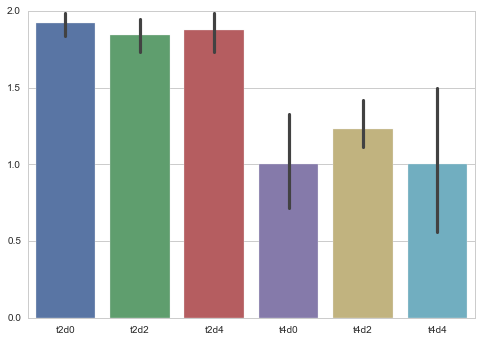

In [29]:
sns.barplot(data=Kchart)

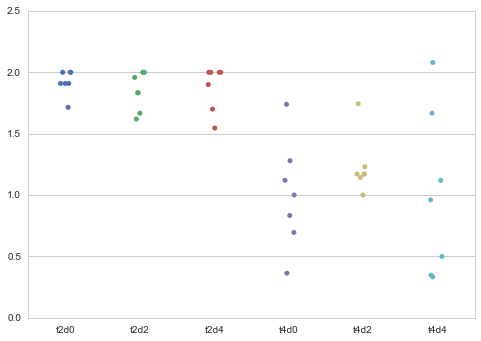

In [30]:
sns.stripplot(data=Kchart, jitter=True)